In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Found GPU at: /device:GPU:0
Tensorflow version 2.4.1


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from keras.applications import VGG19
from sklearn.model_selection import train_test_split
import cv2
from sklearn.preprocessing import LabelBinarizer as lb
from keras.layers import Input
import tensorflow as tf
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import sklearn.metrics as metrics
import seaborn as sns
from keras.utils import to_categorical

In [4]:
# df=pd.read_csv('/content/drive/MyDrive/Mosiac_ps2/Alphabets.csv')
df=pd.read_csv('/content/drive/MyDrive/Mosiac_ps2/digits_alpha.csv')
# df.drop(columns='Unnamed: 0',inplace=True)
# df=df.sample(frac=1)
# train_x=np.transpose(df[:,1:])

    

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df

,9,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,1,1.1,1.2,0.27,0.28,0.29,2,2.1,2.2,0.30,0.31,0.32,...,3.68,3.69,3.70,3.71,0.1515,0.1516,0.1517,0.1518,0.1519,0.1520,0.1521,0.1522,0.1523,0.1524,0.1525,0.1526,0.1527,0.1528,0.1529,0.1530,0.1531,0.1532,0.1533,0.1534,0.1535,0.1536,0.1537,0.1538,0.1539,0.1540,0.1541,0.1542,0.1543,0.1544,0.1545,0.1546,0.1547,0.1548,0.1549,0.1550
0,9,0,0,0,4,4,4,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,0,0,0,2,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,2,2,2,0,0,0,0,0,0,...,0,4,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36570,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36571,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36572,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,4,4,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
36573,5,0,0,0,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
p=['key']+[i for i in range(785)]
l=df.columns.to_list()
d=dict(zip(l,p))
df.rename(columns=d,inplace=True)

In [7]:
# df=df.sample(frac=1)
df.reset_index(inplace=True,drop=True)
# df.drop('index',inplace=True)

In [8]:
df['key'].nunique()

44

In [9]:
df['key']=df['key'].replace(1,'1')
df['key']=df['key'].replace(2,'2')
df['key']=df['key'].replace(3,'3')
df['key']=df['key'].replace(4,'4')
df['key']=df['key'].replace(5,'5')
df['key']=df['key'].replace(5,'5')
df['key']=df['key'].replace(6,'6')
df['key']=df['key'].replace(7,'7')
df['key']=df['key'].replace(8,'8')
df['key']=df['key'].replace(9,'9')
df['key']=df['key'].replace(0,'O')

In [10]:
train_x=np.transpose(df.values[:,1:].reshape(len(df),28,28,3),axes=[0,1,2,3])
train_y=df.iloc[:,0]
num_classes=train_y.nunique()
train_y=np.asarray(train_y)
train_x=train_x/255

In [11]:
def show_image(dx,dy,n):
  img=(dx[n]*255).astype(int)
  img=img.reshape((28,28,3))
  # img=cv2.resize(img,(128,128,3))
  plt.title(dy[n])
  plt.imshow(img,cmap='gray')

In [12]:
elements=df['key'].unique()

In [13]:
elements

array(['9', 'F', 'T', 'D', 'H', '4', 'O', 'B', 'S', '8', 'J', 'C', 'L',
       '7', '1', 'Z', 'M', 'A', 'E', 'W', 'N', 'I', 'G', 'U', 'K', 'X',
       'P', '3', 'Y', 'R', 'Q', '2', 'V', '6', '5'], dtype=object)

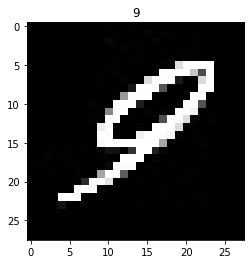

In [14]:
show_image(train_x,train_y,15)

In [15]:
num_classes=35

In [16]:
l_b=lb()
Y=l_b.fit_transform(train_y)
# y= to_categorical(train_y, num_classes)

In [17]:
x_train,x_test,y_train,y_test=train_test_split(train_x,Y,test_size=0.20,random_state=2)

In [18]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


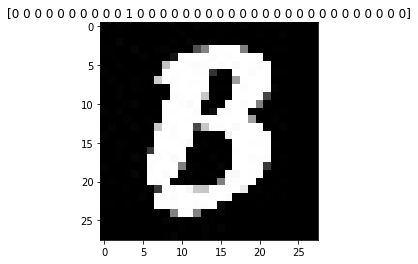

In [19]:
show_image(x_train,y_train,1)



In [20]:
# some=l_b.inverse_transform(Y)
# print(len(some))

In [21]:
# some=l_b.inverse_transform(elem)
# print(len(some))

In [22]:
print(num_classes)

35


In [23]:

# vgg19_model = VGG19(include_top = True, weights='imagenet',input_tensor=Input(shape=(28,28, 3)))
# vgg19_model.summary()

In [24]:

# model = Sequential()

# # add all layers except output from VGG19 to new model
# for layer in vgg19_model.layers[:-1]:
#   model.add(layer)
  
# # freeze all weights
# for layer in model.layers:
#   layer.trainable = False
  
# # add dropout layer and new output layer
# model.add(Dropout(0.5))
# model.add(Dense(35, activation='softmax'))
# model.summary()

In [25]:
model = Sequential()
model.add(Conv2D(input_shape=(28,28,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.4))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# model.add(Dropout(0.4))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes,activation="softmax"))

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       7

In [27]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Mosiac_ps2/weights/checkpoint2.h5',
                                 monitor='val_acc',
                                 verbose=1,
                                 save_best_only=False,
                                 mode='auto')

In [28]:
def scheduler(epoch, lr):
    
    
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [29]:
from keras.callbacks import LearningRateScheduler

In [30]:
callback=LearningRateScheduler(scheduler)
batch_size=200
steps_per_epoch = int( np.ceil(x_train.shape[0] / batch_size) )
print(steps_per_epoch)

147


In [31]:
len(train_x)

36575

In [32]:
data_generator_aug=ImageDataGenerator(rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,validation_split=0.1)
data_generator=ImageDataGenerator(validation_split=0.1)

In [33]:
training_data_generator = data_generator_aug.flow(x_train,y_train,batch_size=200, subset='training')
validation_data_generator = data_generator.flow(x_train,y_train,batch_size=200,subset='validation')
history = model.fit(training_data_generator, steps_per_epoch=130, epochs=30, validation_data=validation_data_generator,validation_steps=1,callbacks=[checkpoint,callback])

Epoch 1/30
130/130 [==============================] - 19s 108ms/step - loss: 2.9250 - accuracy: 0.2630 - val_loss: 4.8951 - val_accuracy: 0.1100

Epoch 00001: saving model to /content/drive/MyDrive/Mosiac_ps2/weights/checkpoint2.h5
Epoch 2/30
130/130 [==============================] - 13s 102ms/step - loss: 0.7260 - accuracy: 0.7915 - val_loss: 5.3541 - val_accuracy: 0.2200

Epoch 00002: saving model to /content/drive/MyDrive/Mosiac_ps2/weights/checkpoint2.h5
Epoch 3/30
130/130 [==============================] - 13s 102ms/step - loss: 0.4842 - accuracy: 0.8665 - val_loss: 0.8223 - val_accuracy: 0.7900

Epoch 00003: saving model to /content/drive/MyDrive/Mosiac_ps2/weights/checkpoint2.h5
Epoch 4/30
130/130 [==============================] - 13s 102ms/step - loss: 0.3942 - accuracy: 0.8888 - val_loss: 1.2332 - val_accuracy: 0.7800

Epoch 00004: saving model to /content/drive/MyDrive/Mosiac_ps2/weights/checkpoint2.h5
Epoch 5/30
130/130 [==============================] - 13s 101ms/step - l

In [34]:
model.save('/content/drive/MyDrive/Mosiac_ps2/weights/my_model2.h5')

In [35]:
x_train[3:4].shape

(1, 28, 28, 3)

In [36]:
# class_mapping='123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [37]:
p=tf.convert_to_tensor(x_train[13:14],dtype=float)
t=model.predict(p)
# k=np.argmax(t)
k=l_b.inverse_transform(t)
print(k)

['X']


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


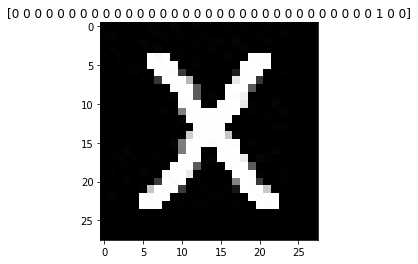

In [38]:

show_image(x_train,y_train,13)

In [39]:
p=y_test[0:1]
c=l_b.inverse_transform(p)


In [40]:
x_test=tf.convert_to_tensor(x_test,dtype=float)
y_test=tf.convert_to_tensor(y_test,dtype=float)

In [41]:
score=model.evaluate(tf.convert_to_tensor(x_test),tf.convert_to_tensor(y_test),verbose=1)

229/229 [==============================] - 2s 6ms/step - loss: 0.0637 - accuracy: 0.9850


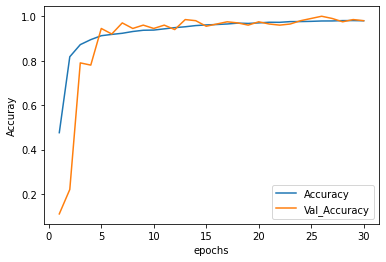

In [42]:
q = len(history.history['accuracy'])

plt.figsize=(10,10)
sns.lineplot(x = range(1,1+q),y = history.history['accuracy'], label='Accuracy')
sns.lineplot(x = range(1,1+q),y = history.history['val_accuracy'], label='Val_Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuray')
plt.savefig('/content/drive/MyDrive/Mosiac_ps2/plts/my_model2.png')

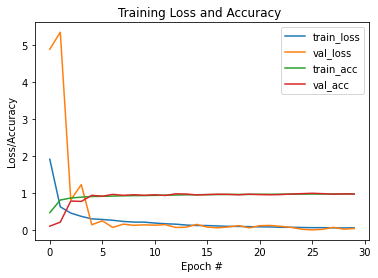

In [43]:
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy ")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('/content/drive/MyDrive/Mosiac_ps2/plts/my_model2_acc_vs_val.png')